In [1]:
from google.colab import drive, files
import json
import numpy as np


In [2]:
# change this to work with your setup
drive.mount("/content/drive/", force_remount=True)



Mounted at /content/drive/


In [3]:
!unzip "/content/drive/MyDrive/CV673_Segmentation/CelebAMask-HQ.zip"

Streaming output truncated to the last 5000 lines.
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19597_neck.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19597_nose.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19597_r_brow.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19597_r_eye.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19597_skin.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19597_u_lip.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19598_hair.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19598_l_brow.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19598_l_eye.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19598_l_lip.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19598_mouth.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19598_neck.png  
  inflating: CelebAMask-HQ/CelebAMask-HQ-mask-anno/9/19598_nose.png  
  inflating: CelebAMask-HQ/Cel

In [4]:
import os
import cv2
import glob
import random
import numpy as np
import tensorflow as tf
import tensorflow.keras.preprocessing.image as image_pre
import os
import cv2
import glob
import numpy as np

from google.colab.patches import cv2_imshow

In [5]:
mkdir /content/CelebAMask-HQ/CelebAMaskHQ-groundtruth /content/CelebAMask-HQ/CelebAMaskHQ-groundtruth-color

In [6]:

label_list = ['skin', 'nose', 'eye_g', 'l_eye', 'r_eye', 'l_brow', 'r_brow', 'l_ear', 'r_ear', 'mouth', 'u_lip', 'l_lip', 'hair', 'hat', 'ear_r', 'neck_l', 'neck', 'cloth']

folder_base = '/content/CelebAMask-HQ/CelebAMask-HQ-mask-anno'
folder_save = '/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth'
img_num = 30000

for k in range(img_num):
    folder_num = k // 2000
    im_base = np.zeros((512, 512))
    for idx, label in enumerate(label_list):
      filename = os.path.join(folder_base, str(folder_num), str(k).rjust(5, '0') + '_' + label + '.png')
      #print(filename)
      if (os.path.exists(filename)):
        im = cv2.imread(filename)
        im = im[:, :, 0]
        im_base[im != 0] = (idx + 1)
    filename_save = os.path.join(folder_save, str(k) + '.png')
    print(filename_save)
    cv2.imwrite(filename_save, im_base)  



Streaming output truncated to the last 5000 lines.
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25000.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25001.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25002.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25003.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25004.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25005.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25006.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25007.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25008.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25009.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25010.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25011.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25012.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25013.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25014.png
/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/25015.png
/content/CelebAMask-H

In [ ]:
im = cv2.imread(filename_save)


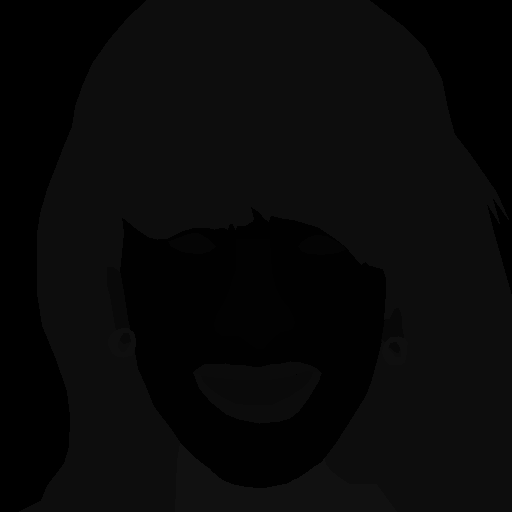

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(im)

In [ ]:
check = np.asarray(im)
print(np.unique(check))

[ 0  1  2  4  5  8  9 10 11 12 13 15 17]


In [ ]:
cp -r "/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth" "/content/drive/MyDrive/CV673_Segmentation/CelebAMaskHQ-masked"

In [11]:
all_trainfiles  = list()
all_labels = list()
all_trainfiles = glob.glob(f"/content/CelebAMask-HQ/CelebA-HQ-img/*.jpg")
all_labels = glob.glob(f"/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/*.png")
all_trainfiles = sorted(all_trainfiles)
all_labels = sorted(all_labels)

In [51]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
all_trainfiles, all_labels = shuffle(all_trainfiles, all_labels)

X_train, X_test, y_train, y_test = train_test_split(all_trainfiles, all_labels, test_size=0.3)

In [52]:
print(X_train[2], y_train[2])

/content/CelebAMask-HQ/CelebA-HQ-img/24385.jpg /content/CelebAMask-HQ/CelebAMaskHQ-groundtruth/24385.png


In [72]:
class AgumentedDataGenerator(tf.keras.utils.Sequence):
  def __init__(self, img_path, label_path, batch_size, is_training):
    self.img_path = img_path
    self.label_path = label_path
    self.is_training = is_training
    self.batch_size = batch_size

  def __getitem__(self, index):

    #X = np.empty((self.batch_size, *self.dims))
    #y = np.empty((self.batch_size, *self.dims))
    X = []
    Y = []

    X_batch = self.img_path[index*self.batch_size:(index+1)*self.batch_size]
    y_batch = self.label_path[index*self.batch_size:(index+1)*self.batch_size]
    #print("Len of batch", X_batch)
    for i in range(len(X_batch)):
      #print("files:",X_batch[i],y_batch[i])
      image_x = tf.keras.preprocessing.image.load_img(X_batch[i],grayscale=False, color_mode="rgb")
      image_y = tf.keras.preprocessing.image.load_img(y_batch[i],grayscale=True)

      image_x = tf.keras.preprocessing.image.img_to_array(image_x)
      image_y = tf.keras.preprocessing.image.img_to_array(image_y)
      image_x = np.array(tf.image.resize(image_x,[128,128]))
      image_y = np.array(tf.image.resize(image_y,[128,128]))
      
      X.append(image_x)
      Y.append(image_y)
    print(np.array(X).shape, np.array(Y).shape)
    X = np.array(X, np.float32) / 255
    Y = np.array(Y, np.float32) / 255
    #Y = np.array(Y)
    #return X, tf.keras.utils.to_categorical(Y, num_classes=19)
    return X, Y

  def __len__(self):
    return len(self.img_path) // self.batch_size



In [54]:
import os
import cv2
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import binary_crossentropy
import tensorflow.keras.backend as K

In [73]:
datagenerator = AgumentedDataGenerator(np.array(X_train),np.array(y_train), 32, False)
testgenerator = AgumentedDataGenerator(np.array(X_test),np.array(y_test), 32, False)

In [56]:
import tensorflow.keras.layers as layers
def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    padding="same",
    use_bias=False,
):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return tf.nn.relu(x)


def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output

In [57]:
def DeeplabV3Plus(image_size, num_classes):
    model_input = keras.Input(shape=(image_size, image_size, 3))
    resnet50 = keras.applications.ResNet50(include_top=False, input_tensor=model_input
    )
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)

    input_a = layers.UpSampling2D(
        size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
        interpolation="bilinear",
    )(x)
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = layers.UpSampling2D(
        size=(image_size // x.shape[1], image_size // x.shape[2]),
        interpolation="bilinear",
    )(x)
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    return keras.Model(inputs=model_input, outputs=model_output)



In [68]:
checkpoint = ModelCheckpoint(
    filepath="/content/drive/MyDrive/CV673_Segmentation/output/deeplab_model.h5",
    monitor='acc',
    mode='auto',
    save_best_only='True')


model = DeeplabV3Plus(image_size=128, num_classes=19)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']       

In [ ]:
# loss = 'categorical_crossentropy'
# #loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     loss=loss,
#     metrics=["accuracy"],
# )

# history = model.fit(datagenerator, epochs=1)


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(32, 128, 128, 19)
(32, 128, 128, 19)
656/656 [==============================] - 2280s 3s/step - loss: 15.7889 - accuracy: 0.7871


In [69]:
#loss = 'categorical_crossentropy'
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=loss,
    metrics=['accuracy']
)

history = model.fit(datagenerator, epochs=1, callbacks=[checkpoint])


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


656/656 [==============================] - 896s 1s/step - loss: 0.0235 - accuracy: 0.9970


In [70]:
history.history

{'accuracy': [0.9970334768295288], 'loss': [0.023473963141441345]}

In [74]:
preds = model.predict(testgenerator)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(32, 128, 128, 3) (32, 128, 128, 1)
(32, 128, 128, 3) (32, 128, 128, 1)
(32, 128, 128, 3) (32, 128, 128, 1)


ResourceExhaustedError: ignored

In [ ]:
#IOU function for mean calculation averaged over the total classes.
def mean_iou(y_true, y_pred):
    print("Shape of input":, K.int_shape(y_pred)[-1])
    num_labels = 19
    total_iou = K.variable(0)
    for label in range(num_labels):
        total_iou = total_iou + iou(y_true, y_pred, label)
    return total_iou / num_labels



In [ ]:
# checkpoint = ModelCheckpoint(
#     filepath="/content/drive/MyDrive/CV673_Segmentation/output/%s_model.h5" %
#     'deeplab',
#     monitor='acc',
#     mode='auto',
#     save_best_only='True')

# model2 = DeeplabV3Plus(image_size=128, num_classes=3)
# model2.summary()

In [ ]:
# all_labels_color = list()
# all_labels_color = glob.glob(f"/content/CelebAMask-HQ/CelebAMaskHQ-groundtruth-color/*.png")
# all_labels_color = sorted(all_labels)
# all_trainfiles, all_labels_color = shuffle(all_trainfiles, all_labels_color)
# X_train, X_test, y_train_color, y_test_color = train_test_split(all_trainfiles, all_labels_color, test_size=0.3)

In [ ]:
# class AgumentedDataGeneratorcolor(tf.keras.utils.Sequence):
#   def __init__(self, img_path, label_path, batch_size, is_training):
#     self.img_path = img_path
#     self.label_path = label_path
#     self.is_training = is_training
#     self.batch_size = batch_size

#   def __getitem__(self, index):

#     X = []
#     Y = []

#     X_batch = self.img_path[index*self.batch_size:(index+1)*self.batch_size]
#     y_batch = self.label_path[index*self.batch_size:(index+1)*self.batch_size]
#     for i in range(len(X_batch)):
#       image_x = tf.keras.preprocessing.image.load_img(X_batch[i],grayscale=False, color_mode="rgb")
#       image_y = tf.keras.preprocessing.image.load_img(y_batch[i],grayscale=False, color_mode="rgb")

#       image_x = tf.keras.preprocessing.image.img_to_array(image_x)
#       image_y = tf.keras.preprocessing.image.img_to_array(image_y)
#       image_x = np.array(tf.image.resize(image_x,[128,128]))
#       image_y = np.array(tf.image.resize(image_y,[128,128]))
      
#       X.append(image_x)
#       Y.append(image_y)
#     #print(np.array(X).shape, np.array(Y).shape)
#     X = np.array(X, np.float32) / 255
#     Y = np.array(Y, np.float32) / 255
#     return X, Y

#   def __len__(self):
#     return len(self.img_path) // self.batch_size



In [ ]:
# loss = 'categorical_crossentropy'
# #loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# model2.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     loss=loss,
#     metrics=["accuracy"],
# )

# datagenerator = AgumentedDataGeneratorcolor(np.array(X_train),np.array(y_train_color), 32, False)
# testgenerator = AgumentedDataGeneratorcolor(np.array(X_test),np.array(y_test_color), 32, False)
# history = model2.fit(datagenerator, epochs=1)


In [75]:
img = np.array(tf.keras.preprocessing.image.load_img(X_test[0],grayscale=False, color_mode="rgb"))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.array(tf.image.resize(img,[128,128]))

img = np.expand_dims(img, axis=0)
print(img.shape)
#testgenerator = AgumentedDataGenerator(X_test[0],y_test[0], 32, False)
results = model.predict(img,3,verbose=1)


(1, 128, 128, 3)
1/1 [==============================] - 2s 2s/step


In [ ]:
results